In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install xlrd

States Dataframe

In [55]:
states = pd.read_csv("4.18states.csv")
deaths = pd.read_csv("time_series_covid19_deaths_US.csv")
counties=pd.read_csv('abridged_couties.csv')
cases=pd.read_csv('time_series_covid19_confirmed_US.csv')

In [56]:
states1 = states[states['Country_Region'] == 'US']
states1 = states1.drop(columns = ['Lat','Long_','UID','ISO3','Country_Region','FIPS','Last_Update'], axis = 1)
states1 = states1[states1['Province_State'] != 'Diamond Princess']
states1 = states1[states1['Province_State'] != 'Grand Princess']
states1 = states1[states1['Province_State'] != 'Recovered']
states1 = states1.groupby('Province_State').sum()
states1.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,
Alabama,4712,153,0.0,4559.0,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
Alaska,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
American Samoa,0,0,0.0,0.0,0.000000,3.0,0.0,0.000000,5.391708,0.000000
Arizona,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
Arkansas,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,932.435235,16.685780


Counties Dataframe

In [57]:
ny=counties[counties['State']=='New York'].reset_index(drop=True)
full_ny=counties[counties['State']=='New York'].reset_index(drop=True)

In [58]:
ny.drop(['STATEFP','StateName',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
         'FracMale2017','CensusPopulation2010','PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010',
        '#HospParticipatinginNetwork2017'], inplace=True,axis=1)

In [59]:
full_ny['countyFIPS'] = full_ny['countyFIPS'].astype(np.int64)
ny['countyFIPS'] = ny['countyFIPS'].astype(np.int64)

Cases Dataframe

In [60]:
ny_cases=cases[cases['Province_State']=='New York'].reset_index(drop=True)
ny_cases.drop(['iso2', 'iso3', 'code3','Country_Region', 'Lat', 'Long_'],inplace=True, axis=1)

In [9]:
cases1 = cases[cases['Country_Region'] == 'US']
cases1 = cases1.drop(columns = ['Lat','Long_','Country_Region','Admin2','UID','Combined_Key','FIPS','code3','iso2','iso3'], axis = 1)
cases1 = cases1[cases1['Province_State'] != 'Diamond Princess']
cases1 = cases1[cases1['Province_State'] != 'Grand Princess']
cases1 = cases1.groupby('Province_State').sum()
cases1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,2703,2947,3217,3563,3734,3953,4075,4345,4571,4712
Alaska,0,0,0,0,0,0,0,0,0,0,...,235,246,257,272,277,285,293,300,309,314
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1119,1171,1228,1280,1410,1498,1569,1620,1695,1744


In [43]:
ny_cases=cases[cases['Province_State']=='New York'].reset_index(drop=True)
ny_cases.drop(['iso2', 'iso3', 'code3','Country_Region', 'Lat', 'Long_'],inplace=True, axis=1)


Deaths Dataset

In [11]:
deaths1 = deaths
deaths1 = deaths1.drop(columns = ['Lat','Long_'], axis = 1)
deaths1 = deaths1[deaths1['Country_Region'] == 'US']
deaths1 = deaths1.drop(columns = ['Country_Region', 'Admin2','Combined_Key','UID','iso2','iso3','code3','FIPS'], axis = 1)
deaths1 = deaths1[deaths1['Province_State'] != 'Diamond Princess']
deaths1 = deaths1[deaths1['Province_State'] != 'Grand Princess']
deaths1 = deaths1.groupby('Province_State').sum()
deaths1.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,0,0,0,0,0,0,0,0,0,...,70,80,92,93,99,114,118,133,148,153
Alaska,731545,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,9,9,9,9,9
American Samoa,55641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,7278717,0,0,0,0,0,0,0,0,0,...,89,97,108,115,122,131,142,150,169,180
Arkansas,3017804,0,0,0,0,0,0,0,0,0,...,21,21,25,27,29,32,33,37,37,38


In [12]:
deaths_ps = deaths1.drop(columns = ['Population'], axis = 1).groupby('Province_State').sum()
deaths_ps.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,70,80,92,93,99,114,118,133,148,153
Alaska,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,9,9,9,9,9
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,89,97,108,115,122,131,142,150,169,180
Arkansas,0,0,0,0,0,0,0,0,0,0,...,21,21,25,27,29,32,33,37,37,38


U.S. States Visualizations

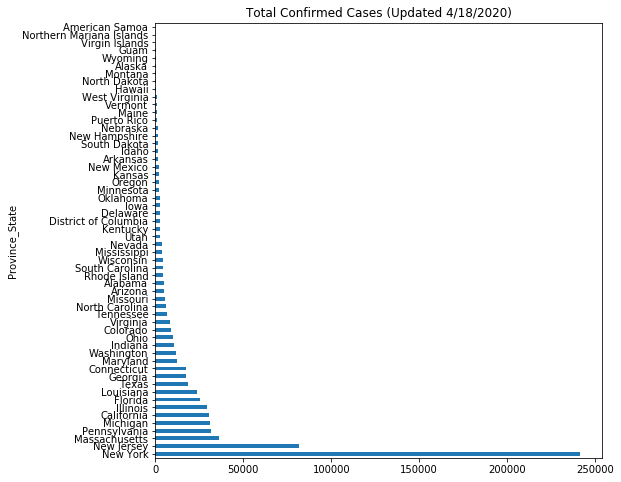

In [13]:
states1['Confirmed'].sort_values(ascending = False).plot(kind='barh', figsize=(8,8), title = 'Total Confirmed Cases (Updated 4/18/2020)')

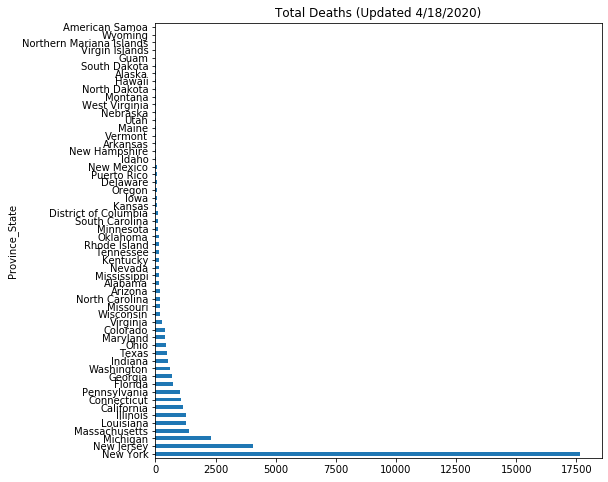

In [14]:
states1['Deaths'].sort_values(ascending = False).plot(kind='barh', figsize=(8,8), title = 'Total Deaths (Updated 4/18/2020)')

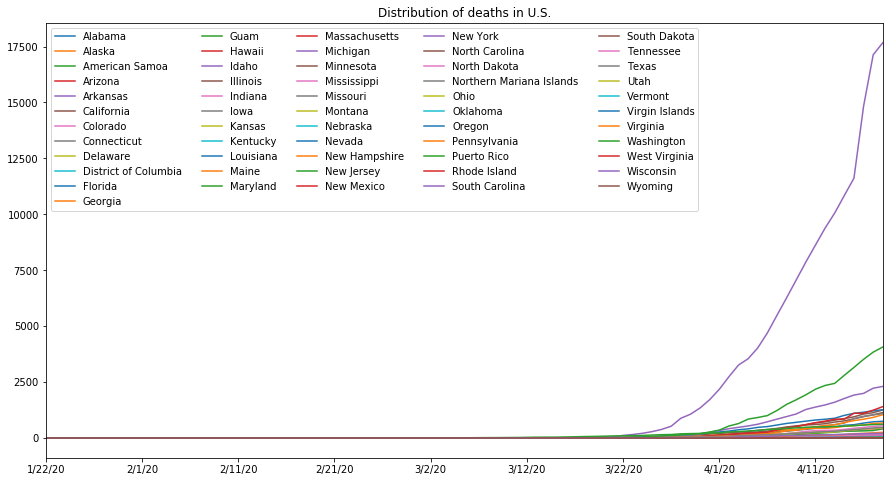

In [15]:
deaths_pst = deaths_ps.T
deaths_pst.plot(figsize = (15,8), title = 'Distribution of deaths in U.S.')
plt.legend(ncol = 5)

In [16]:
population = deaths1.iloc[:,0].to_frame().reset_index()
states_w_pop = pd.merge(left=states1.reset_index(), right=population, how='left', left_on='Province_State', right_on='Province_State')

In [17]:
states_w_pop['% Recovered'] = 100*states_w_pop['Recovered']/states_w_pop['Confirmed']
states_w_pop['% Recovered'] = states_w_pop['% Recovered'].fillna(0)
states_w_pop['% Confirmed'] = 100*states_w_pop['Confirmed']/states_w_pop['Population']
states_w_pop['% Confirmed'] = states_w_pop['% Confirmed'].fillna(0)
states_w_pop['% Deaths'] = 100*states_w_pop['Deaths']/states_w_pop['Population']
states_w_pop['% Deaths'] = states_w_pop['% Deaths'].fillna(0)


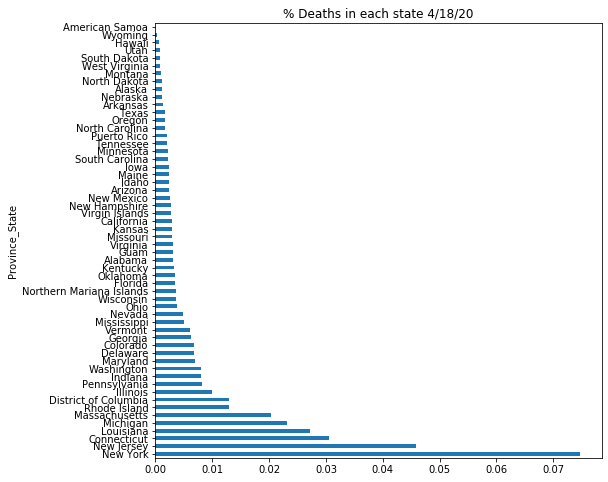

In [18]:
states_w_pop.groupby('Province_State').sum()['% Deaths'].sort_values(ascending = False).plot(kind='barh', figsize=(8,8), title = '% Deaths in each state 4/18/20')

In [19]:
deaths_w = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['Colorado','Wyoming','Montana','Idaho','Washington','Oregon',
                                                   'Utah','Nevada','California','Alaska','Hawaii'])]
deaths_sw = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['Texas','Oaklahoma','New Mexico','Arizona'])]
deaths_mw = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['Ohio','Indiana','Michigan','Iowa','Kansas','Nebraska',
                                                    'South Dakota','North Dakota'])]
deaths_ne = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['Maine','Massachusetts','Rhode Island','Conneticut','New Hampshire',
                                                    'Vermont','New York','Pennsylvania','New Jersey','Delaware','Maryland'])]
deaths_se = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['West Virginia','Virginia','Kentucky','Tennessee','North Carolina','South Carolina',
                                                    'Georgia','Alabama','Mississippi','Arkansas','Louisianna','Florida'])]
deaths_p = deaths_ps.reset_index()[deaths_ps.reset_index()['Province_State'].isin(['American Samoa','Guam','Northern Mariana Islands','Puerto Rico',
                                                  'Virgin Islands', 'District of Columbia'])]


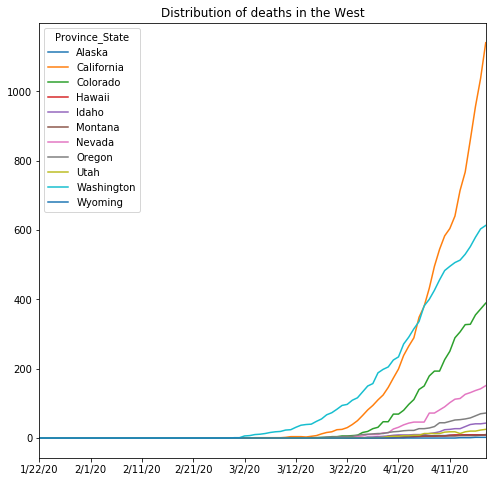

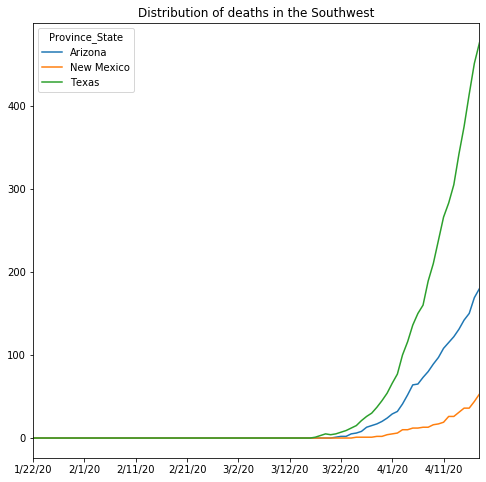

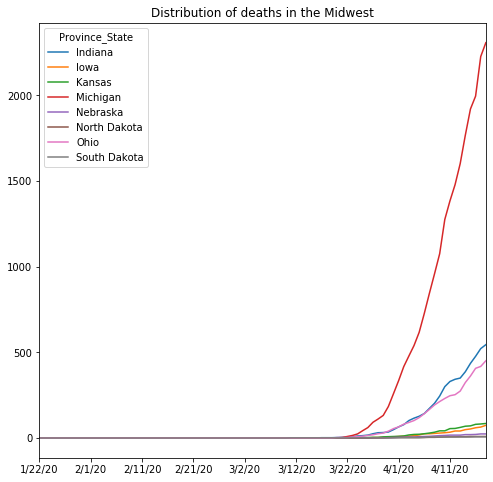

In [20]:
deaths_w = deaths_w.groupby('Province_State').sum()
deaths_wt = deaths_w.T
deaths_wt.plot(figsize = (8,8), title = 'Distribution of deaths in the West')
plt.show()
deaths_sw = deaths_sw.groupby('Province_State').sum()
deaths_swt = deaths_sw.T
deaths_swt.plot(figsize = (8,8), title = 'Distribution of deaths in the Southwest')
plt.show()
deaths_mw = deaths_mw.groupby('Province_State').sum()
deaths_mt = deaths_mw.T
deaths_mt.plot(figsize = (8,8), title = 'Distribution of deaths in the Midwest')
plt.show()


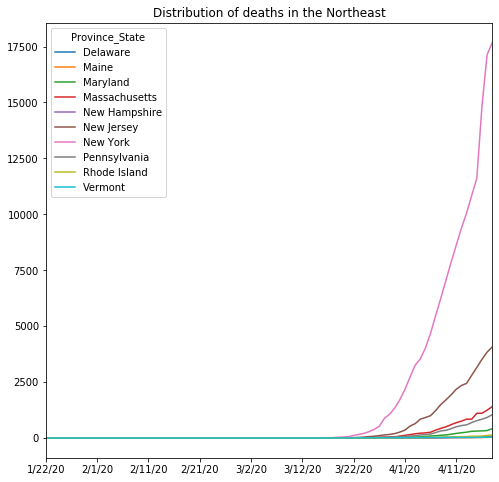

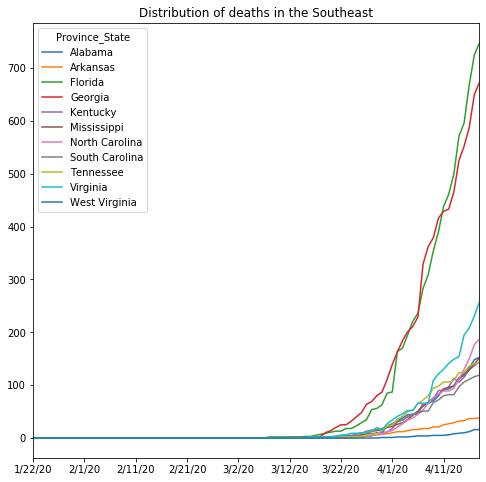

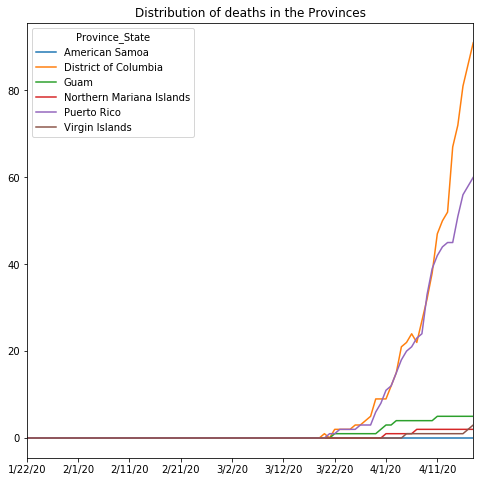

In [21]:
deaths_ne = deaths_ne.groupby('Province_State').sum()
deaths_net = deaths_ne.T
deaths_net.plot(figsize = (8,8), title = 'Distribution of deaths in the Northeast')
plt.show()
deaths_se = deaths_se.groupby('Province_State').sum()
deaths_set = deaths_se.T
deaths_set.plot(figsize = (8,8), title = 'Distribution of deaths in the Southeast')
plt.show()
deaths_p = deaths_p.groupby('Province_State').sum()
deaths_pt = deaths_p.T
deaths_pt.plot(figsize = (8,8), title = 'Distribution of deaths in the Provinces')
plt.show()

In [22]:
deaths_density = deaths_ps
pop = deaths1.loc[:,['Population']]

i = 0
while i < 56:
    deaths_density.iloc[i,:] = deaths_density.iloc[i,:].div(pop.iloc[i,:][0])
    i += 1


In [23]:
deaths_wd = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['Colorado','Wyoming','Montana','Idaho','Washington','Oregon',
                                                   'Utah','Nevada','California','Alaska','Hawaii'])]
deaths_swd = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['Texas','Oaklahoma','New Mexico','Arizona'])]
deaths_mwd = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['Ohio','Indiana','Michigan','Iowa','Kansas','Nebraska',
                                                    'South Dakota','North Dakota'])]
deaths_ned = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['Maine','Massachusetts','Rhode Island','Conneticut','New Hampshire',
                                                    'Vermont','New York','Pennsylvania','New Jersey','Delaware','Maryland'])]
deaths_sed = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['West Virginia','Virginia','Kentucky','Tennessee','North Carolina','South Carolina',
                                                    'Georgia','Alabama','Mississippi','Arkansas','Louisianna','Florida'])]
deaths_pd = deaths_density.reset_index()[deaths_density.reset_index()['Province_State'].isin(['American Samoa','Guam','Northern Mariana Islands','Puerto Rico',
                                                  'Virgin Islands', 'District of Columbia'])]

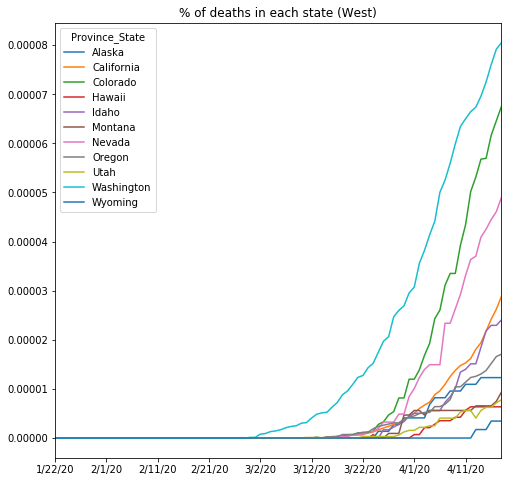

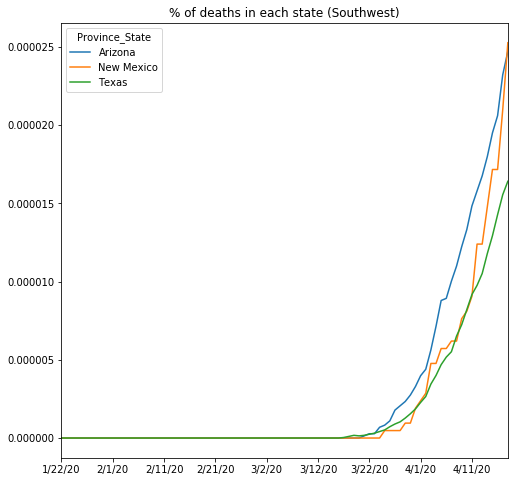

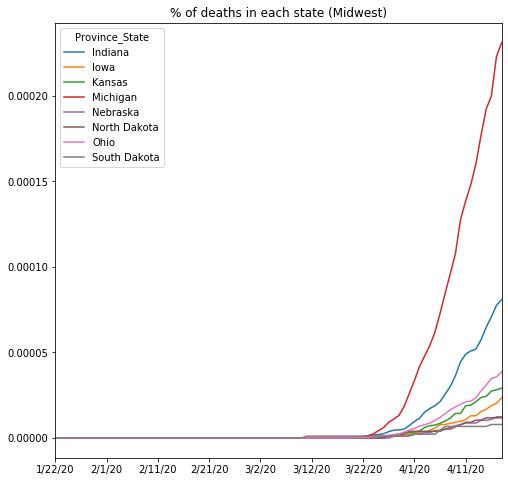

In [24]:
deaths_wd = deaths_wd.groupby('Province_State').sum()
deaths_wtd = deaths_wd.T
deaths_wtd.plot(figsize = (8,8), title = '% of deaths in each state (West)')
plt.show()
deaths_swd = deaths_swd.groupby('Province_State').sum()
deaths_swtd = deaths_swd.T
deaths_swtd.plot(figsize = (8,8), title = '% of deaths in each state (Southwest)')
plt.show()
deaths_mwd = deaths_mwd.groupby('Province_State').sum()
deaths_mtd = deaths_mwd.T
deaths_mtd.plot(figsize = (8,8), title = '% of deaths in each state (Midwest)')
plt.show()


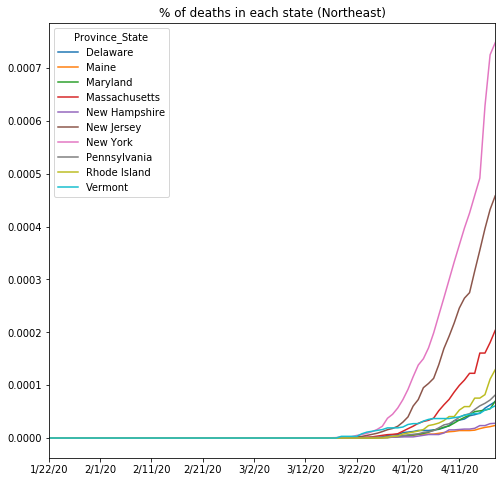

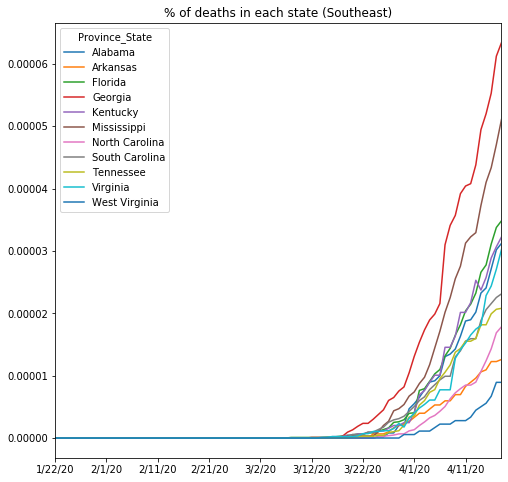

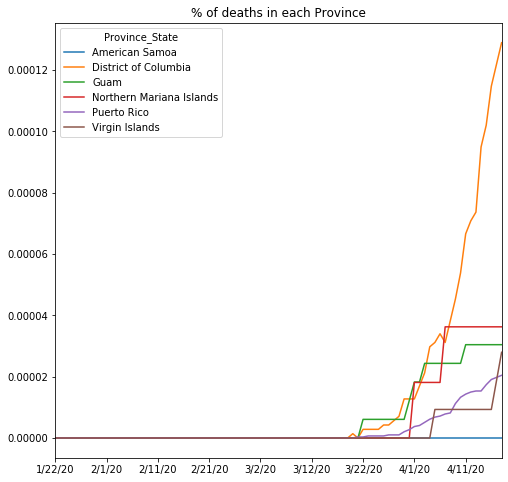

In [25]:
deaths_ned = deaths_ned.groupby('Province_State').sum()
deaths_netd = deaths_ned.T
deaths_netd.plot(figsize = (8,8), title = '% of deaths in each state (Northeast)')
plt.show()
deaths_sed = deaths_sed.groupby('Province_State').sum()
deaths_setd = deaths_sed.T
deaths_setd.plot(figsize = (8,8), title = '% of deaths in each state (Southeast)')
plt.show()
deaths_pd = deaths_pd.groupby('Province_State').sum()
deaths_ptd = deaths_pd.T
deaths_ptd.plot(figsize = (8,8), title = '% of deaths in each Province')
plt.show()

Prediction Model

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [115]:
tr, te = train_test_split(states_w_pop, test_size=0.25, random_state=83)

In [116]:
models = {}

In [117]:
quantitative_features = ['% Confirmed', 'Testing_Rate','Incident_Rate','Hospitalization_Rate','People_Tested','People_Hospitalized','Population']

In [118]:
for i in range(len(quantitative_features)):
    features = quantitative_features[:(i+1)]
    name = ",".join([name[0] for name in features])
    model = Pipeline([
        ("SelectColumns", ColumnTransformer([
            ("keep", StandardScaler(), features),
        ])),
        ("Imputation", SimpleImputer()),
        ("LinearModel", LinearRegression())
    ])
    model.fit(tr, tr['Deaths']);
    models[name] = model

In [119]:
models.keys()

dict_keys(['%', '%,T', '%,T,I', '%,T,I,H', '%,T,I,H,P', '%,T,I,H,P,P', '%,T,I,H,P,P,P'])

In [120]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X))**2))


In [121]:
def compare_models(models):
    training_rmse = [rmse_score(model, tr, tr['Deaths']) for model in models.values()]
    validation_rmse = [np.mean(cross_val_score(model, tr, tr['Deaths'], scoring=rmse_score, cv=5)) 
                       for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = training_rmse, name="Training RMSE"),
        go.Bar(x = names, y = validation_rmse, name="CV RMSE")])
    fig.update_yaxes(title="RMSE")
    return fig


In [122]:
compare_models(models)

In [124]:
def phi(df):
    return df[['% Confirmed', 'Testing_Rate','Incident_Rate','Hospitalization_Rate','People_Tested','People_Hospitalized']]



In [125]:
model = LinearRegression()
model.fit(phi(tr), tr['Deaths'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [127]:
Y_hat = model.predict(phi(tr))
Y = tr['Deaths']
print("Training Error (RMSE):", rmse(Y, Y_hat))

Training Error (RMSE): 190.71610037815057


In [128]:
Y_hat = model.predict(phi(te))
Y = te['Deaths']
print("Test Error (RMSE):", rmse(Y, Y_hat))

Test Error (RMSE): 230.08737808961382


In [63]:
ny_cases.columns

Index(['UID', 'FIPS', 'Admin2', 'Province_State', 'Combined_Key', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '

NY Counties Visualizations

In [65]:
ny_c=ny_cases[['Admin2','1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20']]

ny_c=ny_c.set_index('Admin2').T.reset_index().rename_axis('',axis='columns').rename(columns={'index':'Date'})

In [66]:
ny_c=ny_c.iloc[48:,0:]

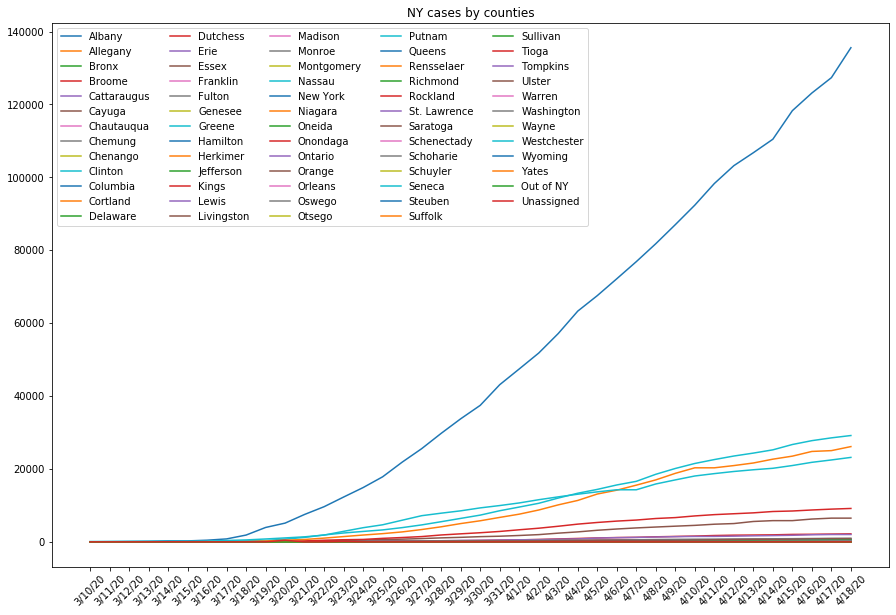

In [67]:
plt.figure(figsize=(15,10))

plt.plot(ny_c['Date'], ny_c.iloc[:,1:])
plt.xticks(rotation=45)
plt.title('NY cases by counties')
plt.legend(ny_c.iloc[:,1:].columns,loc='upper left',ncol=5)
plt.show()

NY Counties Correlation Visualizations

In [68]:
ny_cases['Total cases']=ny_cases.iloc[:, 5:].sum(axis=1)

In [69]:
total_ny_cases=ny.merge(ny_cases[['Total cases','FIPS']],how='left',left_on='countyFIPS',right_on='FIPS').drop(['FIPS'],axis=1)


In [70]:
ny_cases_corr=total_ny_cases[total_ny_cases.columns[:]].corr()[['Total cases']][:].sort_values(by=['Total cases'],ascending=False)
ny_cases_corr

,Total cases
Total cases,1.000000
"TotalM.D.'s,TotNon-FedandFed2017",0.870468
#FTEHospitalTotal2017,0.860067
#ICU_beds,0.809730
PopulationDensityperSqMile2010,0.753068
HPSAUnderservedPop,0.675500
HPSAShortage,0.674969
#Hospitals,0.605139
dem_to_rep_ratio,0.591981
"MedicareEnrollment,AgedTot2017",0.485624


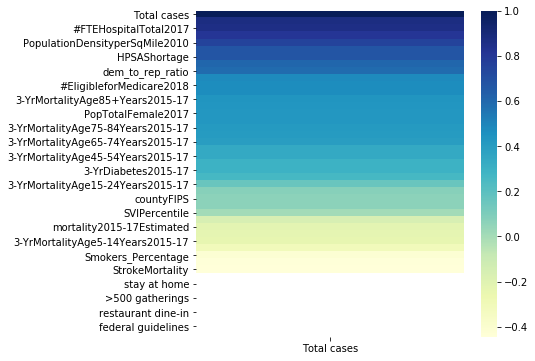

In [71]:
plt.figure(figsize=(6,6))
sns.heatmap(ny_cases_corr, cmap="YlGnBu")

In [72]:
ny_cases_pop_data=full_ny.merge(ny_cases[['Total cases','FIPS']],how='left',left_on='countyFIPS',right_on='FIPS')

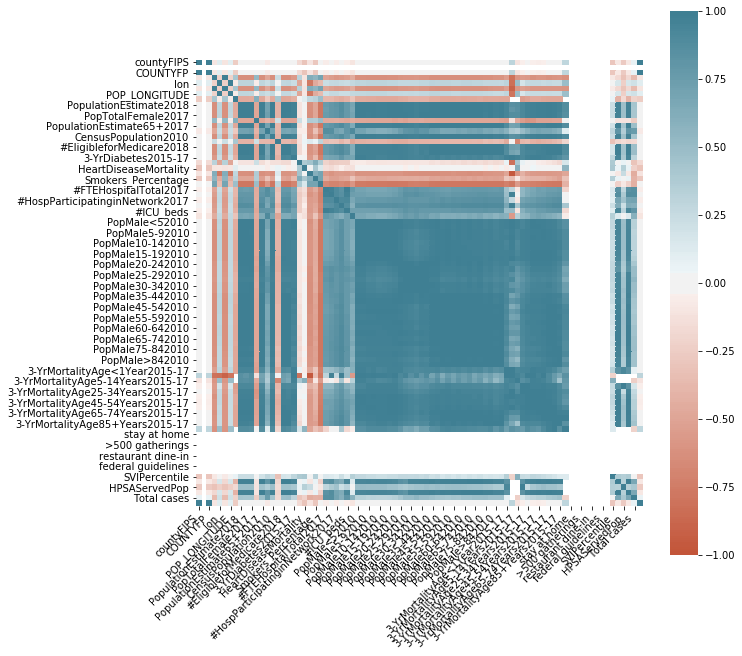

In [73]:
corr = ny_cases_pop_data[ny_cases_pop_data.columns[:]].corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

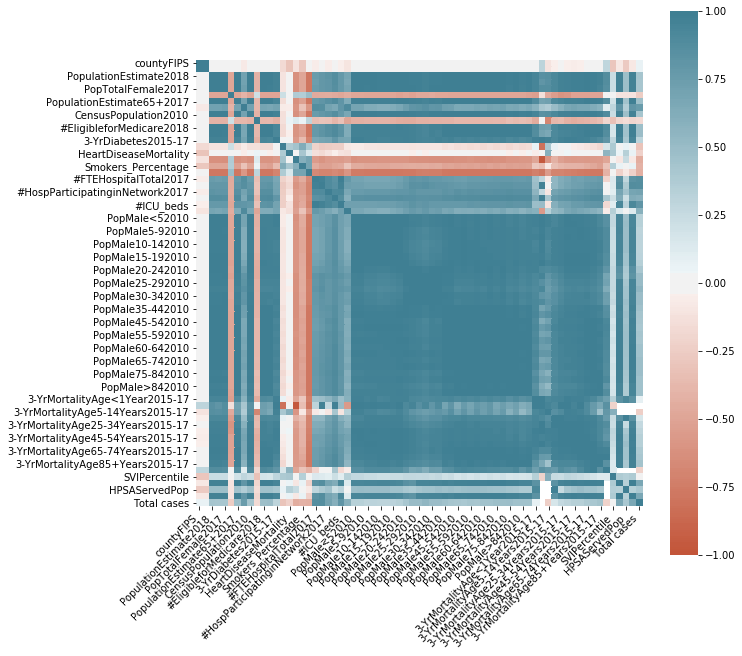

In [74]:
ny_cases_pop_data=ny_cases_pop_data.drop(['FIPS','stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym', 'federal guidelines', 'foreign travel ban','STATEFP','StateName',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013'],axis=1)
corr = ny_cases_pop_data[ny_cases_pop_data.columns[:]].corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [75]:
full_ny_cases_corr=ny_cases_pop_data[ny_cases_pop_data.columns[:]].corr()[['Total cases']][:].sort_values(by=['Total cases'],ascending=False)
full_ny_cases_corr

,Total cases
Total cases,1.000000
"TotalM.D.'s,TotNon-FedandFed2017",0.870468
#FTEHospitalTotal2017,0.860067
#ICU_beds,0.809730
PopulationDensityperSqMile2010,0.753068
...,...
DiabetesPercentage,-0.304991
Smokers_Percentage,-0.411992
RespMortalityRate2014,-0.434307
StrokeMortality,-0.444826


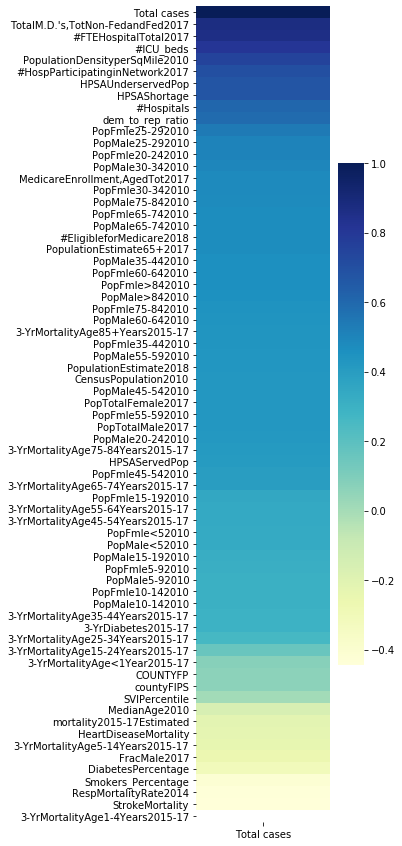

In [76]:
plt.figure(figsize=(3,15))
sns.heatmap(full_ny_cases_corr, cmap="YlGnBu")

NY Counties with High/Low Cases

In [77]:
#top 5 counties with most cases
most_cases=ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False).iloc[0:10,:].reset_index(drop=True)
#four counties with no cases
least_case_w_zeros=ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False).iloc[-4:,:].reset_index(drop=True)
#top 5 counties with more than 1 case
least_cases=ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False).iloc[:-4].iloc[-10:,:].reset_index(drop=True) 

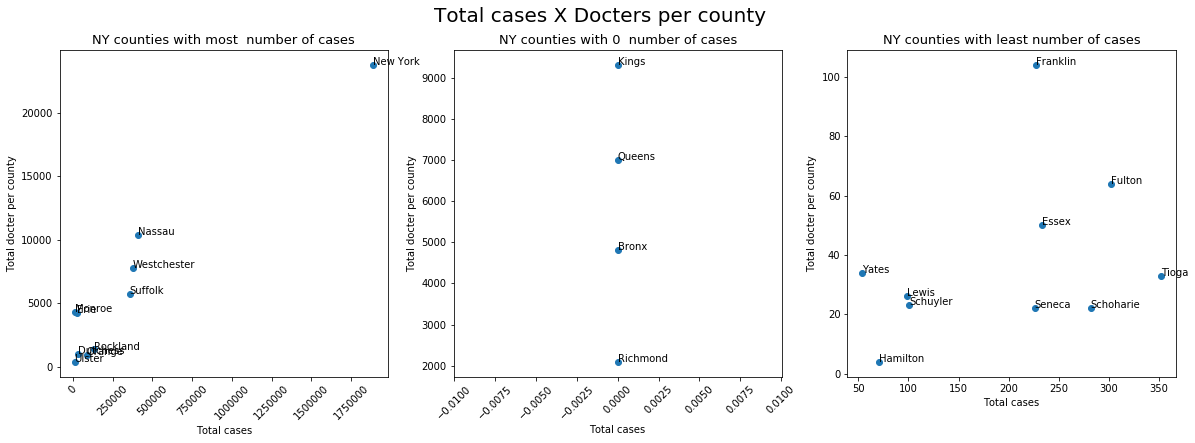

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6)) 
fig.suptitle('Total cases X Docters per county',fontsize=20)

ax1.scatter(most_cases['Total cases'], most_cases["TotalM.D.'s,TotNon-FedandFed2017"])
ax2.scatter(least_case_w_zeros['Total cases'], least_case_w_zeros["TotalM.D.'s,TotNon-FedandFed2017"])
ax3.scatter(least_cases['Total cases'], least_cases["TotalM.D.'s,TotNon-FedandFed2017"])

ax1.set_title('NY counties with most  number of cases', fontsize=13)
ax2.set_title('NY counties with 0  number of cases', fontsize=13)
ax3.set_title('NY counties with least number of cases', fontsize=13)


ax1.set_xlabel('Total cases')
ax1.set_ylabel('Total docter per county')
ax2.set_xlabel('Total cases')
ax2.set_ylabel('Total docter per county')
ax3.set_xlabel('Total cases')
ax3.set_ylabel('Total docter per county')


ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

for i, txt in enumerate(most_cases['CountyName']):
    ax1.annotate(txt, (most_cases['Total cases'][i], most_cases["TotalM.D.'s,TotNon-FedandFed2017"][i]))
for i, txt in enumerate(least_case_w_zeros['CountyName']):
    ax2.annotate(txt, (least_case_w_zeros['Total cases'][i], least_case_w_zeros["TotalM.D.'s,TotNon-FedandFed2017"][i]))
for i, txt in enumerate(least_cases['CountyName']):
    ax3.annotate(txt, (least_cases['Total cases'][i], least_cases["TotalM.D.'s,TotNon-FedandFed2017"][i]))

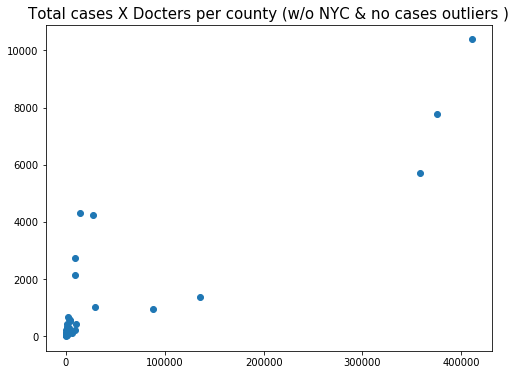

In [80]:
plt.figure(figsize=(8,6))
plt.title('Total cases X Docters per county (w/o NYC & no cases outliers )',fontsize=15)
plt.scatter(ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False)['Total cases'][1:-4],
            ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False)["TotalM.D.'s,TotNon-FedandFed2017"][1:-4])

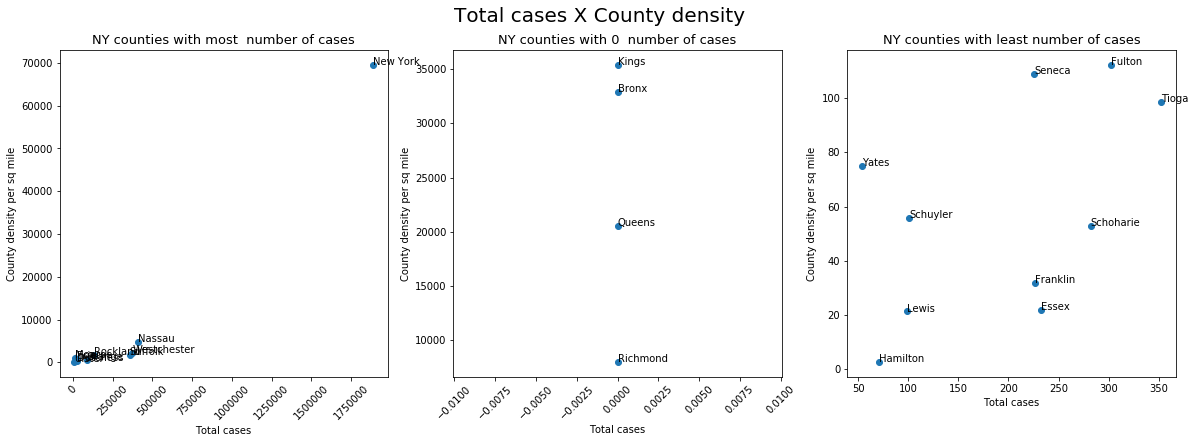

In [81]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,6)) 
fig.suptitle('Total cases X County density',fontsize=20)

ax1.scatter(most_cases['Total cases'], most_cases["PopulationDensityperSqMile2010"])
ax2.scatter(least_case_w_zeros['Total cases'], least_case_w_zeros["PopulationDensityperSqMile2010"])
ax3.scatter(least_cases['Total cases'], least_cases["PopulationDensityperSqMile2010"])

ax1.set_title('NY counties with most  number of cases', fontsize=13)
ax2.set_title('NY counties with 0  number of cases', fontsize=13)
ax3.set_title('NY counties with least number of cases', fontsize=13)

ax1.set_xlabel('Total cases')
ax1.set_ylabel('County density per sq mile')
ax2.set_xlabel('Total cases')
ax2.set_ylabel('County density per sq mile')
ax3.set_xlabel('Total cases')
ax3.set_ylabel('County density per sq mile')


ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)


for i, txt in enumerate(most_cases['CountyName']):
    ax1.annotate(txt, (most_cases['Total cases'][i], most_cases["PopulationDensityperSqMile2010"][i]))
for i, txt in enumerate(least_case_w_zeros['CountyName']):
    ax2.annotate(txt, (least_case_w_zeros['Total cases'][i], least_case_w_zeros["PopulationDensityperSqMile2010"][i]))
for i, txt in enumerate(least_cases['CountyName']):
    ax3.annotate(txt, (least_cases['Total cases'][i], least_cases["PopulationDensityperSqMile2010"][i]))

Prediction Models

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn import preprocessing 
from  sklearn.preprocessing import StandardScaler

In [84]:
ny_cases_pop_data=ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False)
all_ny=ny_cases_pop_data.merge(ny_cases[['Total cases','FIPS','1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20']],
                                          how='left',left_on='countyFIPS',right_on='FIPS')

In [85]:
all_ny['Total cases']=all_ny['Total cases_x']

ny_features=all_ny.drop(columns=['Total cases_x','Total cases','Total cases_y','FIPS','countyFIPS', 
                            'COUNTYFP', 'CountyName', 'State','1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20'
                                ])
ny_target=all_ny[['Total cases']]

In [86]:
ny_features=ny_features.apply(lambda x: x.fillna(x.mean()),axis=0)

In [87]:
scaler = StandardScaler()
ny_features_scaled=scaler.fit_transform(ny_features.values)
ny_features = pd.DataFrame(ny_features_scaled, index=ny_features.index, columns=ny_features.columns)

In [88]:
X_tr, X_test, y_tr, y_test = train_test_split(ny_features, ny_target, test_size=0.2, random_state = 8)

In [89]:
def fit_model(Model, k, alphas, Tol=1):
    maes=np.zeros((k, len(alphas)))
    kf = KFold(n_splits=k, random_state=1, shuffle=True)
                  
    fold = 0
    for train_index, val_index in kf.split(X_tr):
        X_train =X_tr.reset_index(drop=True).loc[train_index,:]
        y_train =y_tr.reset_index(drop=True).loc[train_index,:]
        X_val = X_tr.reset_index(drop=True).loc[val_index,:]
        y_val = y_tr.reset_index(drop=True).loc[val_index,:]
        
        for i in range(len(alphas)):
            model = Model(alpha=alphas[i], tol=Tol)
            model.fit(X_train, y_train)
            yhat_val = model.predict(X_val)
            maes[fold,i] = mean_absolute_error(y_val, yhat_val)
        fold += 1
        avg_maes=np.mean(maes, axis=0)
    print( 'Min avg_mae:',min(avg_maes), 'Alpha for min avg_mae:',alphas[np.argmin(avg_maes)])

def test_model(Model,best_alpha,Tol):
    model = Model(alpha=best_alpha,tol=Tol)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    model_test_mae = mean_absolute_error(y_test,y_test_pred)
    return model_test_mae 

**Prediction models w/o case/day info**

Linear Regression

Linear regression Mean Absolute Error: 104245.73254536533


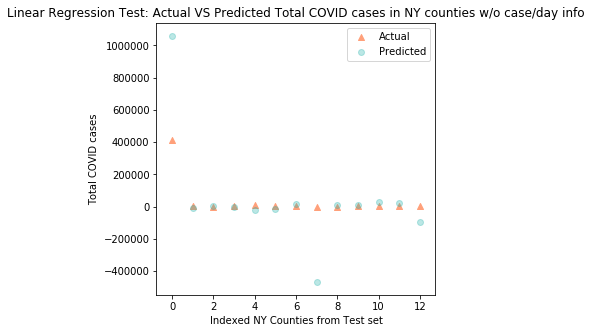

In [90]:
model = LinearRegression()  
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Linear regression Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Linear Regression Test: Actual VS Predicted Total COVID cases in NY counties w/o case/day info')
plt.legend()
plt.show()

In [91]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_[0]})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                              Feature   Coefficients
46                   PopMale75-842010  797788.752263
36                   PopMale35-442010  749979.935152
27                   PopFmle10-142010  677426.750460
42                   PopMale60-642010  582417.041767
30                   PopMale20-242010  482677.799378
48                     PopMale>842010  308364.509673
5      PopulationDensityperSqMile2010  251545.545707
33                   PopFmle25-292010  213291.890906
23                      PopFmle<52010  212091.502206
24                     PopMale5-92010  183847.945838
63                       HPSAShortage  176701.761668
38                   PopMale45-542010  167301.442641
37                   PopFmle35-442010  158211.100072
40                   PopMale55-592010  152461.643165
4           PopulationEstimate65+2017  148991.545169
25                     PopFmle5-92010  136329.326968
31                   PopFmle20-242010  128341.239809
61          mortality2015-17Estimated  115435.

Lasso

In [92]:
alphavalues=np.linspace(110000,120000, 50)
fit_model(Lasso, 5, alphavalues, Tol=1)

Min avg_mae: 90341.21855461916 Alpha for min avg_mae: 116326.5306122449


Mean Absolute Error: 62939.61720365825


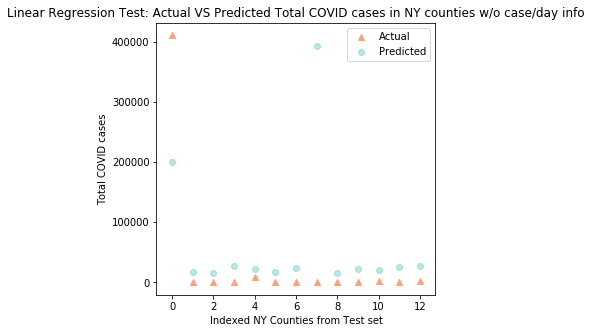

In [93]:
model = Lasso(alpha=116000,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Linear Regression Test: Actual VS Predicted Total COVID cases in NY counties w/o case/day info')
plt.legend()
plt.show()

In [94]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                              Feature  Coefficients
5      PopulationDensityperSqMile2010  87301.584224
16              #FTEHospitalTotal2017  47960.498367
0              PopulationEstimate2018      0.000000
43                   PopFmle60-642010      0.000000
48                     PopMale>842010      0.000000
47                   PopFmle75-842010      0.000000
46                   PopMale75-842010      0.000000
45                   PopFmle65-742010      0.000000
44                   PopMale65-742010      0.000000
42                   PopMale60-642010      0.000000
50      3-YrMortalityAge<1Year2015-17     -0.000000
41                   PopFmle55-592010      0.000000
40                   PopMale55-592010      0.000000
39                   PopFmle45-542010      0.000000
38                   PopMale45-542010      0.000000
37                   PopFmle35-442010      0.000000
36                   PopMale35-442010      0.000000
49                     PopFmle>842010      0.000000
51    3-YrMo

Ridge

In [95]:
alphavalues=np.linspace(0.01,0.1, 25)
fit_model(Ridge, 5, alphavalues, Tol=1)

Min avg_mae: 135470.9007376691 Alpha for min avg_mae: 0.043750000000000004


Mean Absolute Error: 49475.71016637741


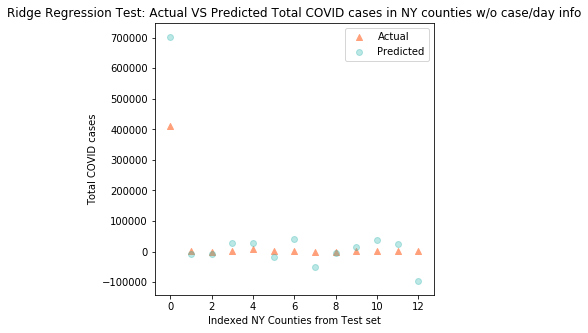

In [96]:
model = Ridge(alpha=0.04,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Ridge Regression Test: Actual VS Predicted Total COVID cases in NY counties w/o case/day info')
plt.legend()
plt.show()

In [97]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_[0]})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                              Feature   Coefficients
17   TotalM.D.'s,TotNon-FedandFed2017  175963.096655
16              #FTEHospitalTotal2017  146365.667474
5      PopulationDensityperSqMile2010  102321.866362
61          mortality2015-17Estimated   99546.123761
38                   PopMale45-542010   99277.759554
46                   PopMale75-842010   89984.783308
44                   PopMale65-742010   78207.017407
27                   PopFmle10-142010   69597.076013
26                   PopMale10-142010   64889.019496
36                   PopMale35-442010   63404.820506
56  3-YrMortalityAge45-54Years2015-17   56749.105718
45                   PopFmle65-742010   55483.809467
9      MedicareEnrollment,AgedTot2017   54650.498008
51    3-YrMortalityAge1-4Years2015-17   35744.149101
25                     PopFmle5-92010   29993.972003
28                   PopMale15-192010   25878.048156
37                   PopFmle35-442010   24781.711280
24                     PopMale5-92010   24628.

Elastic Net

In [98]:
alphavalues=np.linspace(30,100, 30)
fit_model(ElasticNet, 5, alphavalues, Tol=1)

Min avg_mae: 88973.30904909197 Alpha for min avg_mae: 42.06896551724138


Mean Absolute Error: 44428.583156515546


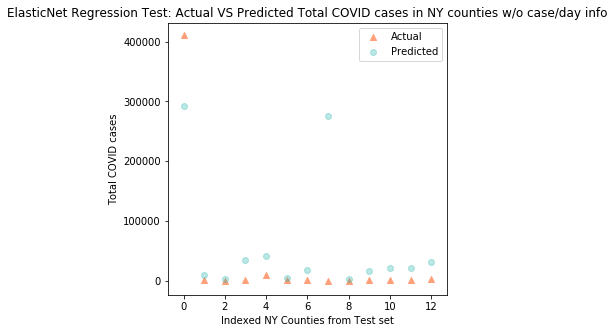

In [99]:
model = ElasticNet(alpha=42,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('ElasticNet Regression Test: Actual VS Predicted Total COVID cases in NY counties w/o case/day info')
plt.legend()
plt.show()

In [100]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                              Feature  Coefficients
16              #FTEHospitalTotal2017   8174.137364
17   TotalM.D.'s,TotNon-FedandFed2017   8124.648334
5      PopulationDensityperSqMile2010   7302.098874
20                          #ICU_beds   7297.575044
21                   dem_to_rep_ratio   6063.660612
18    #HospParticipatinginNetwork2017   5898.777464
19                         #Hospitals   4515.531554
33                   PopFmle25-292010   3502.030358
32                   PopMale25-292010   2990.663557
31                   PopFmle20-242010   2985.448566
34                   PopMale30-342010   2730.850430
35                   PopFmle30-342010   2607.832017
9      MedicareEnrollment,AgedTot2017   2425.237602
8            #EligibleforMedicare2018   2199.100041
36                   PopMale35-442010   2063.395792
4           PopulationEstimate65+2017   1865.423311
30                   PopMale20-242010   1863.825898
45                   PopFmle65-742010   1764.985112
44          

**Prediction models with case/day info**


In [102]:
ny_cases_pop_data=ny_cases_pop_data.sort_values(by=['Total cases'], ascending=False)
all_ny=ny_cases_pop_data.merge(ny_cases[['Total cases','FIPS','1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20']],
                                          how='left',left_on='countyFIPS',right_on='FIPS')
all_ny['Total cases']=all_ny['Total cases_x']

ny_features=all_ny.drop(columns=['Total cases_x','Total cases','Total cases_y','FIPS','countyFIPS', 
                            'COUNTYFP', 'CountyName', 'State','4/12/20', '4/13/20', '4/14/20', '4/15/20',
                               '4/16/20', '4/17/20', '4/18/20'
                                ])

In [103]:
ny_target=all_ny[['Total cases']]
ny_features=ny_features.apply(lambda x: x.fillna(x.mean()),axis=0)
scaler = StandardScaler()
ny_features_scaled=scaler.fit_transform(ny_features.values)
ny_features = pd.DataFrame(ny_features_scaled, index=ny_features.index, columns=ny_features.columns)
X_tr, X_test, y_tr, y_test = train_test_split(ny_features, ny_target, test_size=0.2, random_state = 8)

Linear Regression

Linear regression Mean Absolute Error: 2557.730668870045


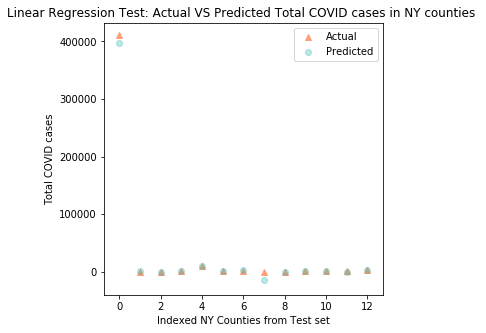

In [104]:
model = LinearRegression()  
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Linear regression Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Linear Regression Test: Actual VS Predicted Total COVID cases in NY counties ')
plt.legend()
plt.show()

In [105]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_[0]})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                               Feature  Coefficients
143                             4/8/20  21355.100271
146                            4/11/20  21165.978493
144                             4/9/20  20399.643898
145                            4/10/20  20163.102918
142                             4/7/20  19606.297219
141                             4/6/20  18604.999627
140                             4/5/20  14886.990469
139                             4/4/20  13576.270001
138                             4/3/20  12005.708761
131                            3/27/20  10242.090132
130                            3/26/20  10074.564671
137                             4/2/20   9892.156177
134                            3/30/20   9637.057089
129                            3/25/20   9188.512904
133                            3/29/20   9021.807042
135                            3/31/20   8788.790721
132                            3/28/20   7732.948888
136                             4/1/20   7714.

Lasso

Mean Absolute Error: 48868.93928858057


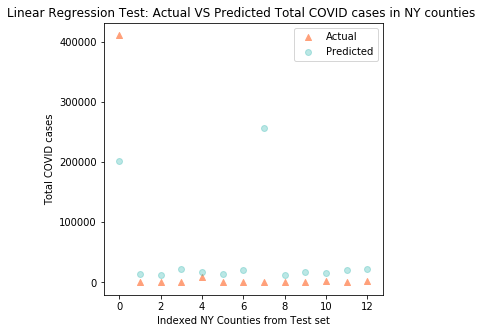

In [106]:
#Didnt show the 5-fold CV for optimal alpha step. Same method as previous lasso model
model = Lasso(alpha=110000,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Linear Regression Test: Actual VS Predicted Total COVID cases in NY counties ')
plt.legend()
plt.show()

In [107]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                               Feature  Coefficients
106                             3/2/20  66102.301976
5       PopulationDensityperSqMile2010  48007.590388
16               #FTEHospitalTotal2017  43140.179124
118                            3/14/20  12498.580546
120                            3/16/20   4861.917176
117                            3/13/20   2872.741069
131                            3/27/20    422.257893
128                            3/24/20    306.878793
129                            3/25/20    258.060007
17    TotalM.D.'s,TotNon-FedandFed2017    205.783281
140                             4/5/20    162.897575
134                            3/30/20     93.278928
130                            3/26/20     76.056503
133                            3/29/20     75.881911
132                            3/28/20     59.445296
138                             4/3/20     12.057515
145                            4/10/20      8.244054
95                             2/20/20      0.

Ridge

Mean Absolute Error: 2355.5737779406677


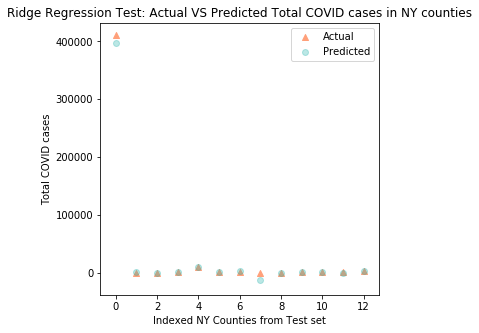

In [108]:
#Didnt show the 5-fold CV for optimal alpha step. Same method as previous ridge model
model = Ridge(alpha=0.00007,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('Ridge Regression Test: Actual VS Predicted Total COVID cases in NY counties')
plt.legend()
plt.show()

In [109]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_[0]})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                               Feature  Coefficients
143                             4/8/20  20635.201369
146                            4/11/20  20516.217508
144                             4/9/20  19824.916239
145                            4/10/20  19618.001872
142                             4/7/20  19108.151010
141                             4/6/20  18299.237670
140                             4/5/20  15080.228214
139                             4/4/20  13805.154773
138                             4/3/20  12358.927543
137                             4/2/20  10330.314283
134                            3/30/20   9772.409321
131                            3/27/20   9754.085597
130                            3/26/20   9454.009117
133                            3/29/20   9218.579561
135                            3/31/20   9182.803462
129                            3/25/20   8743.888210
136                             4/1/20   8360.916476
132                            3/28/20   7965.

Elastic Net

Mean Absolute Error: 14984.155248156416


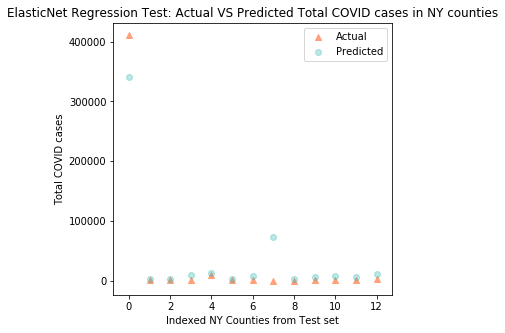

In [110]:
#Didnt show the 5-fold CV for optimal alpha step. Same method as previous elastic model
model = ElasticNet(alpha=25.8,tol=1)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_test)
lr_mae=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', lr_mae)

plt.figure(figsize=(5,5))
plt.scatter(range(len(X_test)),y_test['Total cases'],
            c='lightsalmon',label='Actual',marker='^')
plt.scatter(range(len(X_test)),y_pred,
            c='lightseagreen',label='Predicted',marker='o',alpha=0.3)
plt.ylabel('Total COVID cases')
plt.xlabel('Indexed NY Counties from Test set')
plt.title('ElasticNet Regression Test: Actual VS Predicted Total COVID cases in NY counties')
plt.legend()
plt.show()

In [111]:
importance=pd.DataFrame({"Feature":ny_features.columns.tolist(),"Coefficients":model.coef_})
importance=importance.sort_values(by=['Coefficients'], ascending=False)
print(importance.to_string())

                               Feature  Coefficients
129                            3/25/20   6708.490880
128                            3/24/20   6688.713360
127                            3/23/20   6684.776885
130                            3/26/20   6677.385615
126                            3/22/20   6669.254520
131                            3/27/20   6624.407464
132                            3/28/20   6597.194212
125                            3/21/20   6591.936718
133                            3/29/20   6541.901233
134                            3/30/20   6452.761988
124                            3/20/20   6430.366360
135                            3/31/20   6370.954415
123                            3/19/20   6284.736191
136                             4/1/20   6260.444025
137                             4/2/20   6135.624307
138                             4/3/20   6006.558305
122                            3/18/20   5931.673150
139                             4/4/20   5874.